In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [34]:
# Load the dataset
df_path = r"C:\Users\Lap Tech\Downloads\advertising_ef.csv"

# Read the CSV file
import pandas as pd
df = pd.read_csv(df_path)

# Display basic info and first few rows
print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB

First 5 Rows:
   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     68.95  35.0     61833.90                256.09   
1                       NaN  31.0     68441.85                193.77   
2                     69.47  26.0   

In [40]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
City                        0
Gender                      0
Country                     0
Clicked on Ad               0
dtype: int64


In [38]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Daily Time Spent on Site          Age   Area Income  \
count               1009.000000  1009.000000   1009.000000   
mean                  65.009463    35.962926  54958.573617   
std                   15.848458     8.724147  13308.073492   
min                   32.600000    19.000000  13996.500000   
25%                   51.380000    29.000000  47160.530000   
50%                   68.250000    35.000000  56791.750000   
75%                   78.540000    42.000000  65186.580000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage  Clicked on Ad  
count           1009.000000    1009.000000  
mean             180.041920       0.501487  
std               43.836202       0.500246  
min              104.780000       0.000000  
25%              139.010000       0.000000  
50%              182.650000       1.000000  
75%              218.790000       1.000000  
max              269.960000       1.000000  


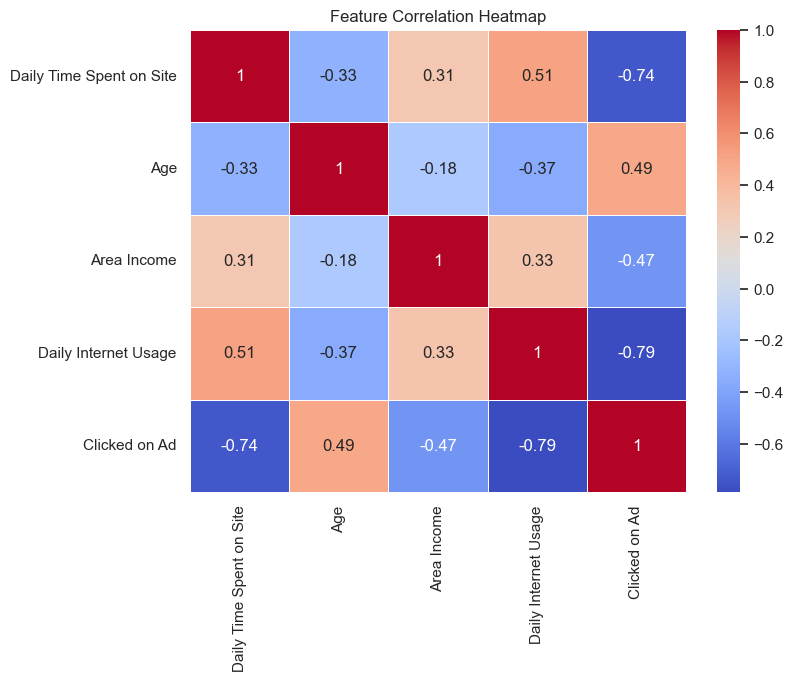

In [53]:

 #Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

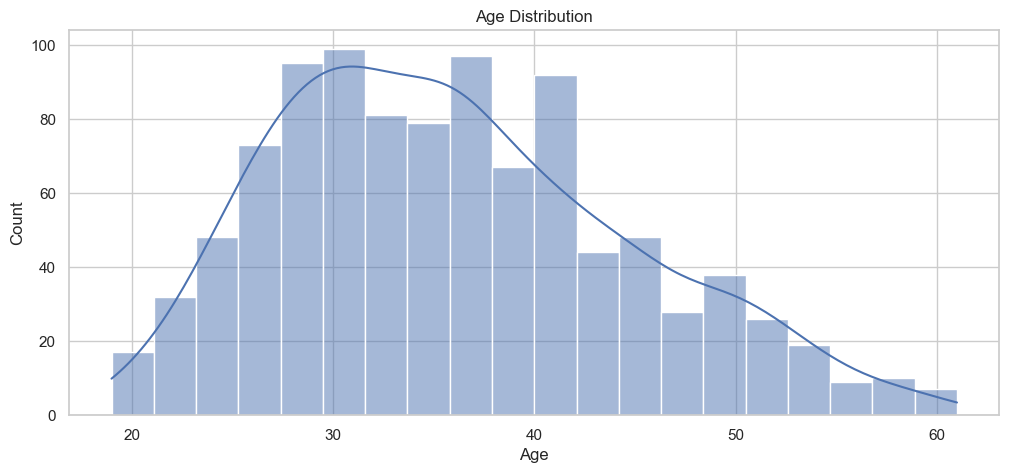

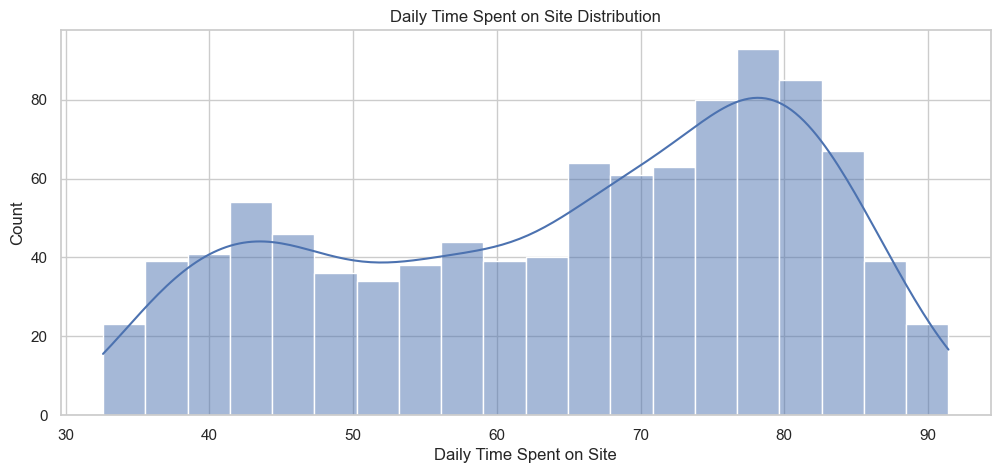

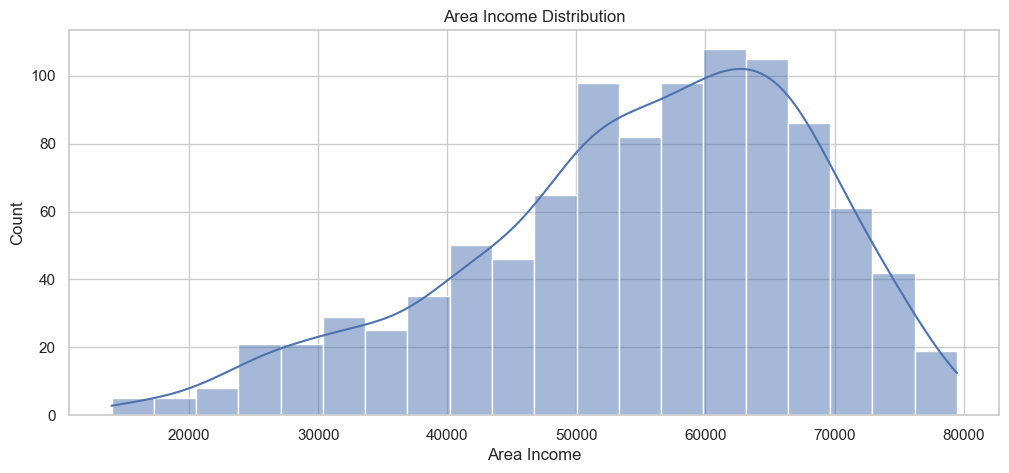

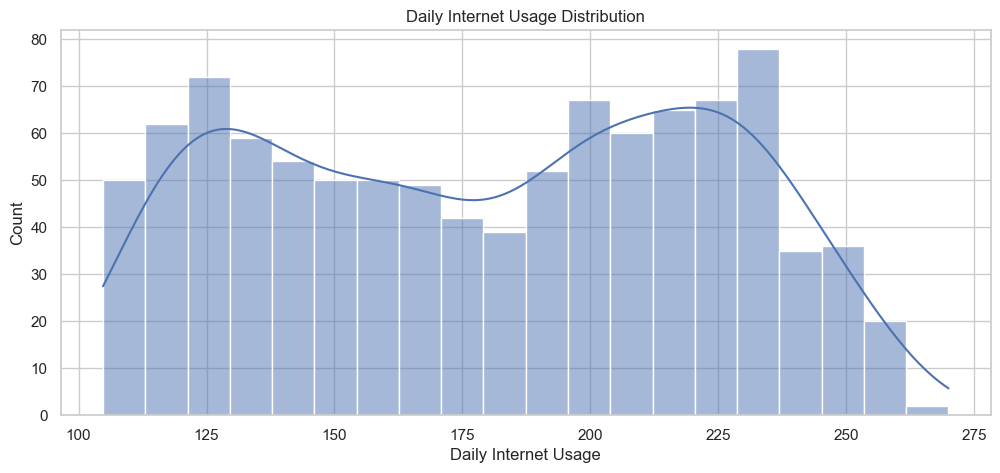

In [44]:
# Visualizing distributions
plt.figure(figsize=(12,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Daily Time Spent on Site'], bins=20, kde=True)
plt.title("Daily Time Spent on Site Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Area Income'], bins=20, kde=True)
plt.title("Area Income Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Daily Internet Usage'], bins=20, kde=True)
plt.title("Daily Internet Usage Distribution")
plt.show()

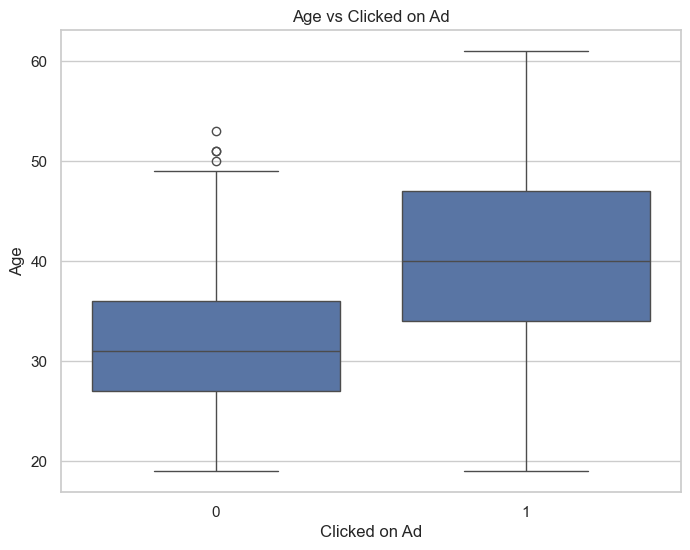

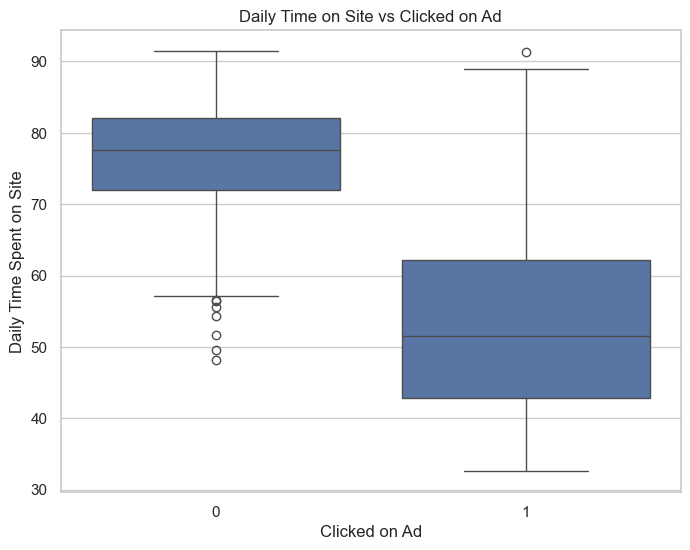

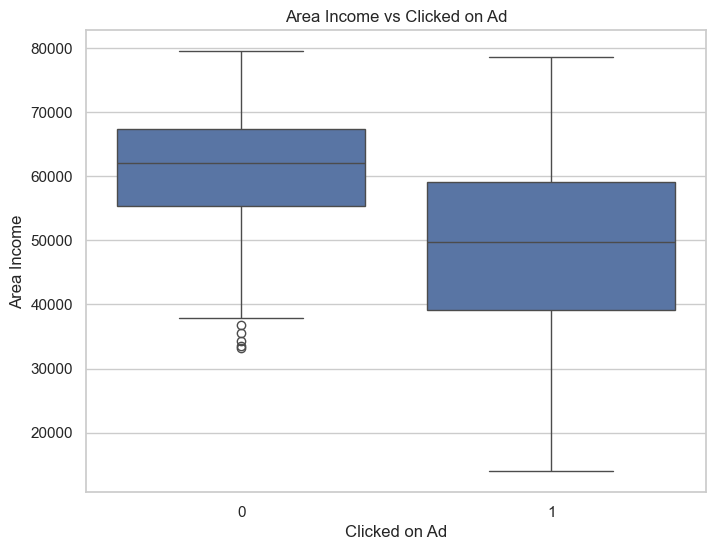

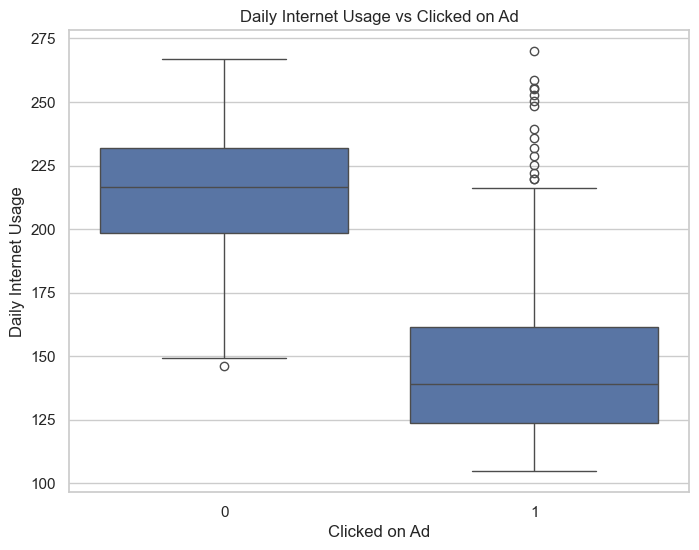

In [46]:
# Boxplots for Ad Click behavior
plt.figure(figsize=(8,6))
sns.boxplot(x='Clicked on Ad', y='Age', data=df)
plt.title("Age vs Clicked on Ad")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)
plt.title("Daily Time on Site vs Clicked on Ad")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df)
plt.title("Area Income vs Clicked on Ad")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df)
plt.title("Daily Internet Usage vs Clicked on Ad")
plt.show()

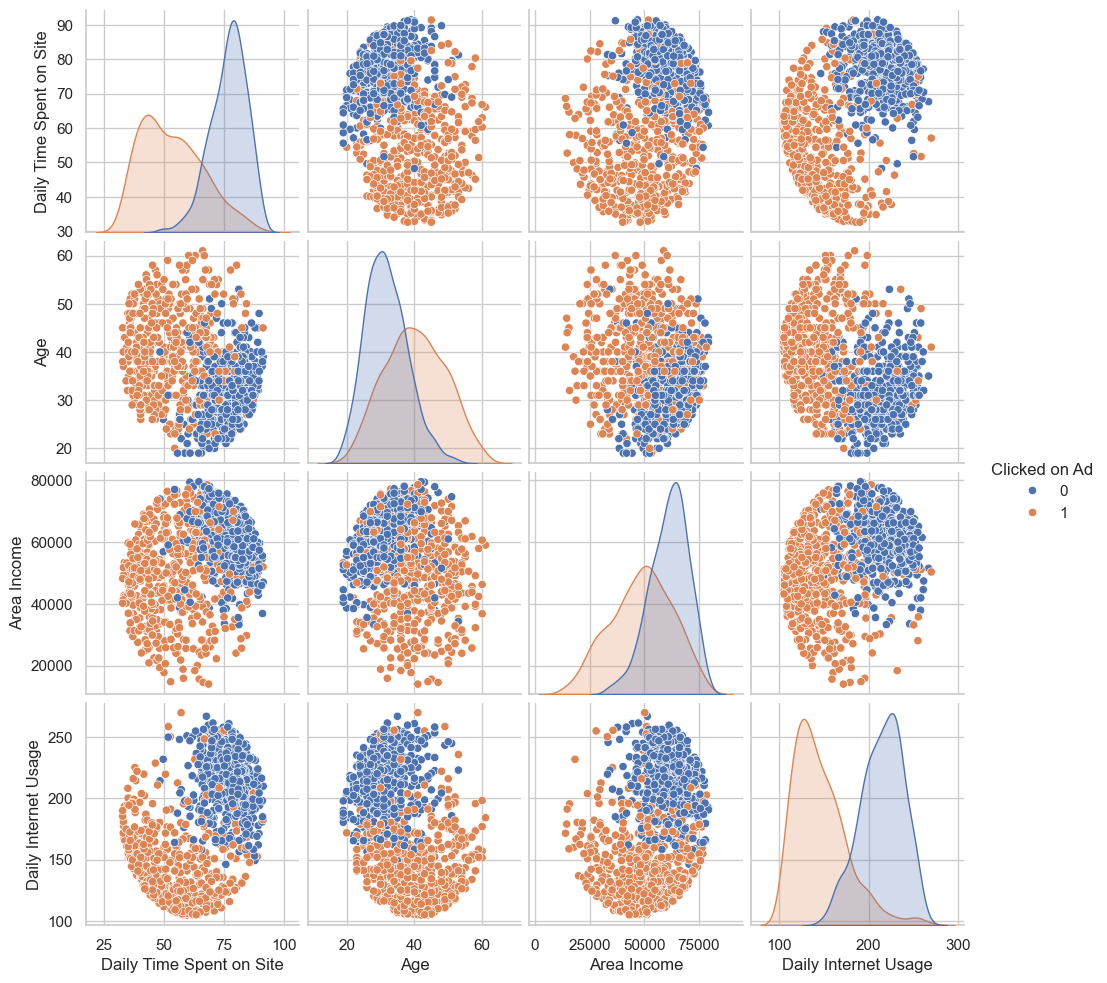

In [48]:
# Pairplot to explore relationships
sns.pairplot(df, hue="Clicked on Ad")
plt.show()


In [57]:
# Insights Extraction




# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if 'Clicked on Ad' exists in numeric columns
if 'Clicked on Ad' in numeric_df.columns:
    correlation = numeric_df.corr()['Clicked on Ad'].sort_values()
    print("\nFeature Correlations with Clicked on Ad:")
    print(correlation)
else:
    print("'Clicked on Ad' is missing or not numeric in the dataset.")


Feature Correlations with Clicked on Ad:
Daily Internet Usage       -0.785501
Daily Time Spent on Site   -0.742964
Area Income                -0.472515
Age                         0.487946
Clicked on Ad               1.000000
Name: Clicked on Ad, dtype: float64


In [59]:
# Encode categorical variables
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Country'] = le.fit_transform(df['Country'])
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Separate numerical and categorical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features = ['City', 'Country', 'Gender']

X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Apply MinMaxScaler to all features (to ensure non-negative values for MultinomialNB)
scaler = MinMaxScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_categorical_scaled = scaler.fit_transform(X_categorical)

# Combine scaled features
X_scaled = np.hstack((X_numerical_scaled, X_categorical_scaled))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Gaussian Naive Bayes Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



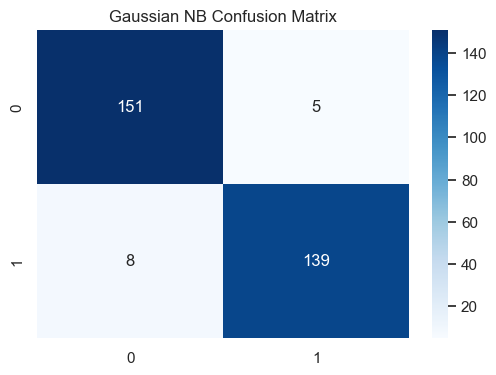

In [61]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian NB Confusion Matrix")
plt.show()

Multinomial Naive Bayes Accuracy: 0.900990099009901
Confusion Matrix:
 [[149   7]
 [ 23 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       156
           1       0.95      0.84      0.89       147

    accuracy                           0.90       303
   macro avg       0.91      0.90      0.90       303
weighted avg       0.91      0.90      0.90       303



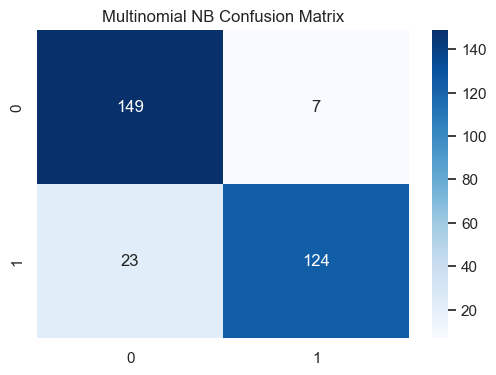

In [63]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluate
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title("Multinomial NB Confusion Matrix")
plt.show()

Bernoulli Naive Bayes Accuracy: 0.528052805280528
Confusion Matrix:
 [[83 73]
 [70 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       156
           1       0.51      0.52      0.52       147

    accuracy                           0.53       303
   macro avg       0.53      0.53      0.53       303
weighted avg       0.53      0.53      0.53       303



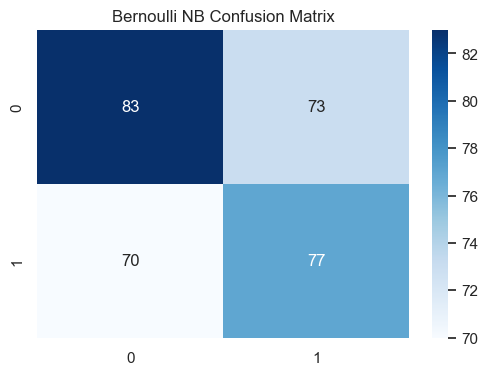

In [65]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Classification Report:\n", classification_report(y_test, y_pred_bnb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Blues')
plt.title("Bernoulli NB Confusion Matrix")
plt.show()

Ensemble Model Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



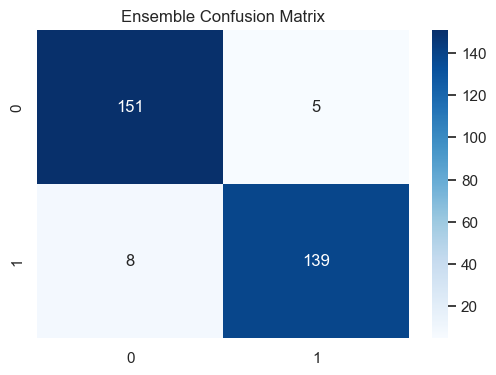

In [67]:
# Ensemble with VotingClassifier (soft voting)
ensemble_model = VotingClassifier(
    estimators=[('gnb', gnb), ('mnb', mnb), ('bnb', bnb)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues')
plt.title("Ensemble Confusion Matrix")
plt.show()


Average Probability Method:
Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303


Weighted Probability Method:
Accuracy: 0.9570957095709571
Confusion Matrix:
 [[151   5]
 [  8 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



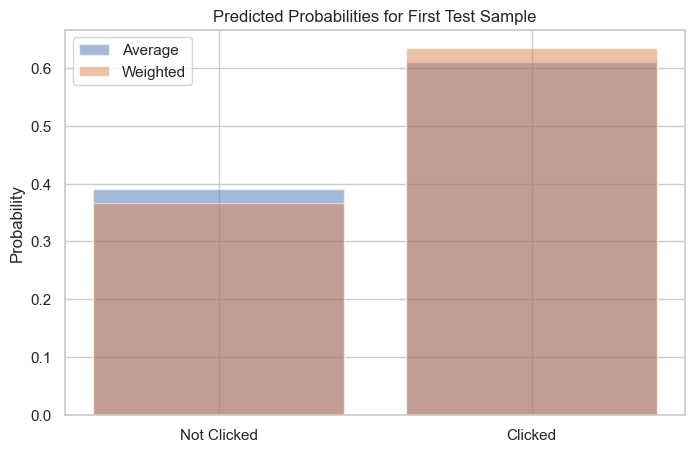

In [69]:
# Get probabilities from each model
probs_gnb = gnb.predict_proba(X_test)
probs_mnb = mnb.predict_proba(X_test)
probs_bnb = bnb.predict_proba(X_test)

# Method 1: Average probabilities
combined_probs_avg = (probs_gnb + probs_mnb + probs_bnb) / 3
y_pred_avg = np.argmax(combined_probs_avg, axis=1)

# Method 2: Weighted average (e.g., based on accuracy)
weights = [0.4, 0.3, 0.3]  # Adjust based on model performance
combined_probs_weighted = (weights[0] * probs_gnb + weights[1] * probs_mnb + weights[2] * probs_bnb)
y_pred_weighted = np.argmax(combined_probs_weighted, axis=1)

# Evaluate both methods
print("\nAverage Probability Method:")
print("Accuracy:", accuracy_score(y_test, y_pred_avg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_avg))
print("Classification Report:\n", classification_report(y_test, y_pred_avg))

print("\nWeighted Probability Method:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

# Visualize probabilities for first test sample
plt.figure(figsize=(8, 5))
plt.bar(['Not Clicked', 'Clicked'], combined_probs_avg[0], label='Average', alpha=0.5)
plt.bar(['Not Clicked', 'Clicked'], combined_probs_weighted[0], label='Weighted', alpha=0.5)
plt.title("Predicted Probabilities for First Test Sample")
plt.ylabel("Probability")
plt.legend()
plt.show()